In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import sklearn

In [47]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
len(y_train)

60000

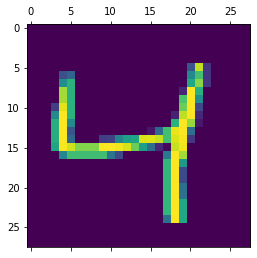

In [50]:
plt.matshow(X_train[2])

In [51]:
y_train[2]

4

In [52]:
X_train = X_train / 255
X_test = X_test / 255

In [53]:
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)
X_train_flattened[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

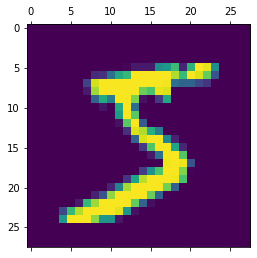

In [54]:
plt.matshow(X_train[0])

In [55]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'] 
)

# Training process
model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4895 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3062 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2853 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2747 - accuracy: 0.9241: 1s - loss: 0.2760 - ac - ETA: 0s
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2675 - accuracy: 0.9271


In [56]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2650 - accuracy: 0.9271


[0.26502105593681335, 0.9271000027656555]

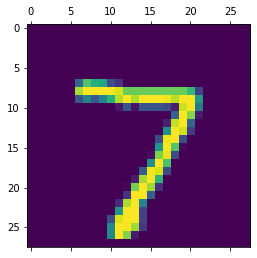

In [57]:
plt.matshow(X_test[0])

In [58]:
y_predict = model.predict(X_test_flattened)
y_predict 

array([[1.6690459e-05, 8.4884169e-11, 3.0370913e-05, ..., 6.8844038e-01,
        7.5142496e-05, 9.5966458e-04],
       [2.1126866e-04, 1.5310923e-06, 4.3116185e-01, ..., 1.6735026e-16,
        5.3264805e-05, 1.7481440e-13],
       [1.9189315e-06, 4.3053064e-01, 1.0032922e-02, ..., 8.2746148e-04,
        3.3267736e-03, 2.9703975e-04],
       ...,
       [2.6974730e-11, 2.9272303e-11, 9.6946406e-09, ..., 2.9819737e-06,
        1.8353396e-05, 5.9069185e-05],
       [9.4425054e-09, 2.3891806e-08, 2.4300192e-08, ..., 3.9779895e-09,
        3.7473440e-04, 2.0006986e-08],
       [8.7240210e-08, 1.6866160e-15, 8.1586006e-07, ..., 5.8325428e-14,
        1.9733912e-09, 1.4915789e-12]], dtype=float32)

In [59]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:3]

[7, 2, 1]

In [60]:
y_predict[0]

array([1.6690459e-05, 8.4884169e-11, 3.0370913e-05, 1.0371387e-02,
       1.0303813e-06, 9.5966112e-05, 1.6264037e-09, 6.8844038e-01,
       7.5142496e-05, 9.5966458e-04], dtype=float32)

In [61]:
np.argmax(y_predict[0])

7

In [62]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

In [63]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   8,    8,  916,   17,    8,    3,   13,   10,   46,    3],
       [   4,    0,   15,  929,    0,   20,    2,   11,   22,    7],
       [   1,    1,    2,    1,  917,    0,   13,    3,   10,   34],
       [   7,    1,    2,   35,    7,  785,   15,    4,   30,    6],
       [  10,    3,    3,    1,    7,   11,  918,    2,    3,    0],
       [   2,    5,   22,    9,    8,    1,    0,  940,    3,   38],
       [   7,    7,    6,   21,    9,   26,   10,    8,  874,    6],
       [  10,    6,    1,   12,   26,    7,    0,   18,    8,  921]])>

Text(69.0, 0.5, 'Truth')

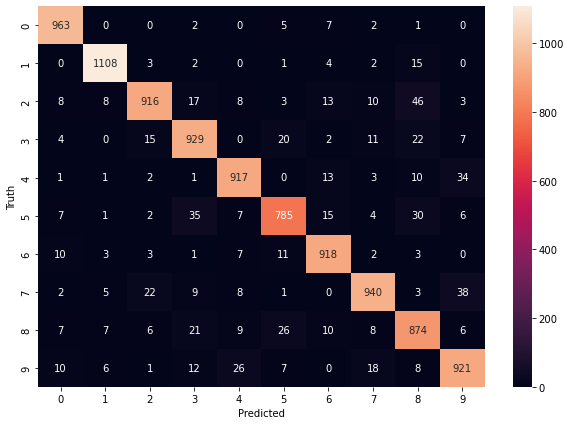

In [64]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
# hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training process
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1386 - accuracy: 0.9598
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0999 - accuracy: 0.9708
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0629 - accuracy: 0.9809


In [66]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9713


[0.09659009426832199, 0.9713000059127808]

In [67]:
y_predict = model.predict(X_test_flattened)
y_predict[:2]

array([[1.04656905e-07, 1.63818770e-09, 4.10050154e-04, 7.53551722e-04,
        6.77694316e-12, 3.82588013e-07, 7.27563084e-13, 7.53148019e-01,
        5.18372217e-05, 5.28356532e-06],
       [4.33163869e-08, 2.62260437e-04, 1.63462639e-01, 8.72814871e-06,
        3.08212102e-15, 6.86690669e-08, 9.44631111e-08, 4.19995934e-13,
        2.67631435e-06, 1.19033635e-12]], dtype=float32)

In [68]:
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    5,    2,    1,    0,    1,    1,    2,    0],
       [   0, 1125,    4,    0,    0,    0,    2,    0,    4,    0],
       [   0,    1, 1010,    5,    2,    0,    2,    6,    6,    0],
       [   0,    0,    2,  996,    0,    0,    1,    4,    6,    1],
       [   1,    0,    4,    0,  964,    0,    2,    2,    0,    9],
       [   3,    0,    0,   39,    4,  817,    9,    2,   15,    3],
       [   5,    3,    3,    1,    6,    1,  934,    1,    4,    0],
       [   2,    6,   12,    3,    0,    0,    0,  991,    3,   11],
       [   4,    1,    6,    8,    5,    0,    1,    2,  945,    2],
       [   4,    6,    1,   15,   13,    0,    0,    3,    4,  963]])>

Text(69.0, 0.5, 'Truth')

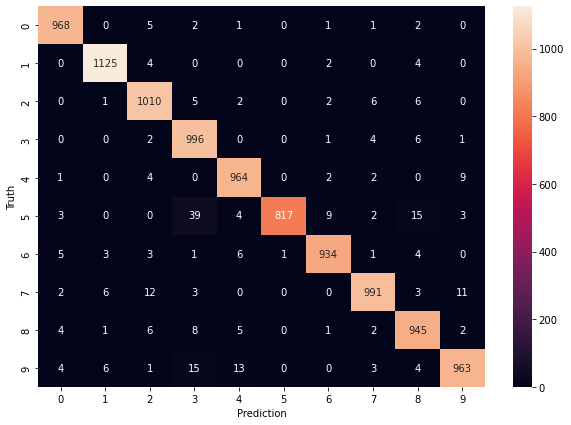

In [69]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [72]:
# if you don't want to flatten the data
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print('wassup')
# Training process
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

wassup
Epoch 1/5
   1/1875 [..............................] - ETA: 1s - loss: 2.2733 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\user\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8470 - accuracy: 0.7982
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3613 - accuracy: 0.9000
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3098 - accuracy: 0.9134
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2806 - accuracy: 0.9215
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9280


In [26]:
inr_rate = np.array([75 for i in range(4)])
revenue = np.array([
    [200, 220, 250],
    [69, 78, 105],
    [110, 140, 180],
    [80, 85, 90]
])
np.dot(inr_rate, revenue)

array([34425, 39225, 46875])

In [27]:
y_predicted = np.array([1, 1, 0, 0, 1])
y_true = np.array([0.5, 0.7, 1, 0, 0.5])

In [28]:
def mae(y_predicted, y_true):
    total_error = 0
    for yt, yp in zip(y_true, y_predicted):
        total_error += abs(yt - yp)
    print(total_error)
    mae = total_error / len(y_true)
    print(f'MAE: {mae}')

In [29]:
mae(y_predicted, y_true)

2.3
MAE: 0.45999999999999996


In [30]:
np.mean(np.abs(y_true - y_predicted))

0.45999999999999996

In [31]:
y_predicted = np.array([1, 1, 0, 0, 1])
y_true = np.array([0.5, 0.7, 1, 0, 0.5])

In [32]:
mse = np.mean(np.square(np.abs(y_true - y_predicted)))

In [33]:
mse

0.318

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/6_gradient_descent/insurance_data.csv')
df.shape

(28, 3)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df['bought_insurance'], test_size=0.2, random_state=25)

In [36]:
len(y_train)

22

In [37]:
# Scaling
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [38]:
X_train_scaled.head(3)

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0


In [39]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid',
    kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 2ms/step - loss: 15.5455 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 15.5294 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 15.5134 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 15.4973 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 15.4813 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 1ms/step - loss: 15.4652 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 15.4492 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 15.4331 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 15.4171 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 15.4010 - accuracy: 0.5000
Epoch 11/

1/1 [==============================] - 0s 2ms/step - loss: 14.2297 - accuracy: 0.5000
Epoch 84/5000
1/1 [==============================] - 0s 2ms/step - loss: 14.2137 - accuracy: 0.5000
Epoch 85/5000
1/1 [==============================] - 0s 4ms/step - loss: 14.1977 - accuracy: 0.5000
Epoch 86/5000
1/1 [==============================] - 0s 4ms/step - loss: 14.1816 - accuracy: 0.5000
Epoch 87/5000
1/1 [==============================] - 0s 2ms/step - loss: 14.1656 - accuracy: 0.5000
Epoch 88/5000
1/1 [==============================] - 0s 4ms/step - loss: 14.1495 - accuracy: 0.5000
Epoch 89/5000
1/1 [==============================] - 0s 3ms/step - loss: 14.1335 - accuracy: 0.5000
Epoch 90/5000
1/1 [==============================] - 0s 3ms/step - loss: 14.1174 - accuracy: 0.5000
Epoch 91/5000
1/1 [==============================] - 0s 3ms/step - loss: 14.1014 - accuracy: 0.5000
Epoch 92/5000
1/1 [==============================] - 0s 3ms/step - loss: 14.0853 - accuracy: 0.5000
Epoch 93/5000


1/1 [==============================] - 0s 6ms/step - loss: 12.9301 - accuracy: 0.5000
Epoch 165/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.9140 - accuracy: 0.5000
Epoch 166/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.8980 - accuracy: 0.5000
Epoch 167/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.8819 - accuracy: 0.5000
Epoch 168/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.8659 - accuracy: 0.5000
Epoch 169/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.8499 - accuracy: 0.5000
Epoch 170/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.8338 - accuracy: 0.5000
Epoch 171/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.8178 - accuracy: 0.5000
Epoch 172/5000
1/1 [==============================] - 0s 2ms/step - loss: 12.8017 - accuracy: 0.5000
Epoch 173/5000
1/1 [==============================] - 0s 3ms/step - loss: 12.7857 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 11.6304 - accuracy: 0.5000
Epoch 246/5000
1/1 [==============================] - 0s 3ms/step - loss: 11.6144 - accuracy: 0.5000
Epoch 247/5000
1/1 [==============================] - 0s 2ms/step - loss: 11.5983 - accuracy: 0.5000
Epoch 248/5000
1/1 [==============================] - 0s 3ms/step - loss: 11.5823 - accuracy: 0.5000
Epoch 249/5000
1/1 [==============================] - 0s 2ms/step - loss: 11.5662 - accuracy: 0.5000
Epoch 250/5000
1/1 [==============================] - 0s 3ms/step - loss: 11.5502 - accuracy: 0.5000
Epoch 251/5000
1/1 [==============================] - 0s 3ms/step - loss: 11.5341 - accuracy: 0.5000
Epoch 252/5000
1/1 [==============================] - 0s 2ms/step - loss: 11.5181 - accuracy: 0.5000
Epoch 253/5000
1/1 [==============================] - 0s 5ms/step - loss: 11.5021 - accuracy: 0.5000
Epoch 254/5000
1/1 [==============================] - 0s 4ms/step - loss: 11.4860 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 10.3307 - accuracy: 0.5000
Epoch 327/5000
1/1 [==============================] - 0s 2ms/step - loss: 10.3147 - accuracy: 0.5000
Epoch 328/5000
1/1 [==============================] - 0s 3ms/step - loss: 10.2987 - accuracy: 0.5000
Epoch 329/5000
1/1 [==============================] - 0s 2ms/step - loss: 10.2826 - accuracy: 0.5000
Epoch 330/5000
1/1 [==============================] - 0s 2ms/step - loss: 10.2666 - accuracy: 0.5000
Epoch 331/5000
1/1 [==============================] - 0s 2ms/step - loss: 10.2505 - accuracy: 0.5000
Epoch 332/5000
1/1 [==============================] - 0s 2ms/step - loss: 10.2345 - accuracy: 0.5000
Epoch 333/5000
1/1 [==============================] - 0s 3ms/step - loss: 10.2184 - accuracy: 0.5000
Epoch 334/5000
1/1 [==============================] - 0s 2ms/step - loss: 10.2024 - accuracy: 0.5000
Epoch 335/5000
1/1 [==============================] - 0s 2ms/step - loss: 10.1863 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 9.0311 - accuracy: 0.5000
Epoch 408/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.0150 - accuracy: 0.5000
Epoch 409/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.9990 - accuracy: 0.5000
Epoch 410/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.9829 - accuracy: 0.5000
Epoch 411/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.9669 - accuracy: 0.5000
Epoch 412/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.9509 - accuracy: 0.5000
Epoch 413/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.9348 - accuracy: 0.5000
Epoch 414/5000
1/1 [==============================] - 0s 4ms/step - loss: 8.9188 - accuracy: 0.5000
Epoch 415/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.9027 - accuracy: 0.5000
Epoch 416/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.8867 - accuracy: 0.5000
Epoch 417/5000


1/1 [==============================] - 0s 999us/step - loss: 7.7154 - accuracy: 0.5000
Epoch 490/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6993 - accuracy: 0.5000
Epoch 491/5000
1/1 [==============================] - 0s 997us/step - loss: 7.6833 - accuracy: 0.5000
Epoch 492/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.6672 - accuracy: 0.5000
Epoch 493/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6512 - accuracy: 0.5000
Epoch 494/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6352 - accuracy: 0.5000
Epoch 495/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6191 - accuracy: 0.5000
Epoch 496/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.6031 - accuracy: 0.5000
Epoch 497/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.5870 - accuracy: 0.5000
Epoch 498/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.5710 - accuracy: 0.5000
Epoch 499/5

1/1 [==============================] - 0s 2ms/step - loss: 6.4158 - accuracy: 0.5000
Epoch 571/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3997 - accuracy: 0.5000
Epoch 572/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3837 - accuracy: 0.5000
Epoch 573/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3677 - accuracy: 0.5000
Epoch 574/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3516 - accuracy: 0.5000
Epoch 575/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.3356 - accuracy: 0.5000
Epoch 576/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3195 - accuracy: 0.5000
Epoch 577/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3035 - accuracy: 0.5000
Epoch 578/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.2874 - accuracy: 0.5000
Epoch 579/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.2714 - accuracy: 0.5000
Epoch 580/5000


1/1 [==============================] - 0s 3ms/step - loss: 5.1006 - accuracy: 0.5000
Epoch 653/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0845 - accuracy: 0.5000
Epoch 654/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0685 - accuracy: 0.5000
Epoch 655/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0525 - accuracy: 0.5000
Epoch 656/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0364 - accuracy: 0.5000
Epoch 657/5000
1/1 [==============================] - 0s 4ms/step - loss: 5.0204 - accuracy: 0.5000
Epoch 658/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.0044 - accuracy: 0.5000
Epoch 659/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.9884 - accuracy: 0.5000
Epoch 660/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9723 - accuracy: 0.5000
Epoch 661/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.9563 - accuracy: 0.5000
Epoch 662/5000


1/1 [==============================] - 0s 2ms/step - loss: 3.7880 - accuracy: 0.5000
Epoch 735/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7720 - accuracy: 0.5000
Epoch 736/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.7560 - accuracy: 0.5000
Epoch 737/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.7401 - accuracy: 0.5000
Epoch 738/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7241 - accuracy: 0.5000
Epoch 739/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7082 - accuracy: 0.5000
Epoch 740/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.6922 - accuracy: 0.5000
Epoch 741/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.6763 - accuracy: 0.5000
Epoch 742/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.6603 - accuracy: 0.5000
Epoch 743/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.6444 - accuracy: 0.5000
Epoch 744/5000


1/1 [==============================] - 0s 3ms/step - loss: 2.4919 - accuracy: 0.5000
Epoch 817/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4764 - accuracy: 0.5000
Epoch 818/5000
1/1 [==============================] - 0s 5ms/step - loss: 2.4609 - accuracy: 0.5000
Epoch 819/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4454 - accuracy: 0.5000
Epoch 820/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4299 - accuracy: 0.5000
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4144 - accuracy: 0.5000
Epoch 822/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3990 - accuracy: 0.5000
Epoch 823/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3836 - accuracy: 0.5000
Epoch 824/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.3681 - accuracy: 0.5000
Epoch 825/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3527 - accuracy: 0.5000
Epoch 826/5000


1/1 [==============================] - 0s 3ms/step - loss: 1.2992 - accuracy: 0.5000
Epoch 899/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2864 - accuracy: 0.5000
Epoch 900/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2737 - accuracy: 0.5000
Epoch 901/5000
1/1 [==============================] - 0s 5ms/step - loss: 1.2611 - accuracy: 0.5000
Epoch 902/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.2485 - accuracy: 0.5000
Epoch 903/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2360 - accuracy: 0.5000
Epoch 904/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2236 - accuracy: 0.5000
Epoch 905/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2113 - accuracy: 0.5000
Epoch 906/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1990 - accuracy: 0.5000
Epoch 907/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.1868 - accuracy: 0.5000
Epoch 908/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.6237 - accuracy: 0.5909
Epoch 981/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.5909
Epoch 982/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.5909
Epoch 983/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.5909
Epoch 984/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.5909
Epoch 985/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.5909
Epoch 986/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.5909
Epoch 987/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.5909
Epoch 988/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.5909
Epoch 989/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6364
Epoch 990/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.8182
Epoch 1062/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.8182
Epoch 1063/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.8182
Epoch 1064/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5771 - accuracy: 0.8182
Epoch 1065/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.8182
Epoch 1066/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.8182
Epoch 1067/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.8182
Epoch 1068/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.8182
Epoch 1069/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5770 - accuracy: 0.8182
Epoch 1070/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.8182
Epoch 1143/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.8182
Epoch 1144/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.8182
Epoch 1145/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.8182
Epoch 1146/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.8182
Epoch 1147/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.8182
Epoch 1148/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.8182
Epoch 1149/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5755 - accuracy: 0.8182
Epoch 1150/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.8182
Epoch 1151/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.8182
Epoch 1224/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.8182
Epoch 1225/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8182
Epoch 1226/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.8182
Epoch 1227/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8182
Epoch 1228/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.8182
Epoch 1229/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.8182
Epoch 1230/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5741 - accuracy: 0.8182
Epoch 1231/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.8182
Epoch 1232/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5740 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8182
Epoch 1305/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.8182
Epoch 1306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.8182
Epoch 1307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8182
Epoch 1308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8182
Epoch 1309/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5725 - accuracy: 0.8182
Epoch 1310/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.8182
Epoch 1311/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5725 - accuracy: 0.8182
Epoch 1312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.8182
Epoch 1313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.8182
Epoch 1386/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.8182
Epoch 1387/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.8182
Epoch 1388/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.8182
Epoch 1389/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.8182
Epoch 1390/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.8182
Epoch 1391/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.8182
Epoch 1392/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8182
Epoch 1393/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5709 - accuracy: 0.8182
Epoch 1394/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.8182
Epoch 1467/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.8182
Epoch 1468/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.8182
Epoch 1469/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.8182
Epoch 1470/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.8182
Epoch 1471/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.8182
Epoch 1472/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.8182
Epoch 1473/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.8182
Epoch 1474/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.8182
Epoch 1475/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.8182
Epoch 1548/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.8182
Epoch 1549/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.8182
Epoch 1550/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5676 - accuracy: 0.8182
Epoch 1551/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5676 - accuracy: 0.8182
Epoch 1552/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.8182
Epoch 1553/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.8182
Epoch 1554/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.8182
Epoch 1555/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5675 - accuracy: 0.8182
Epoch 1556/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.8182
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8182
Epoch 1629/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8182
Epoch 1630/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.8182
Epoch 1631/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.8182
Epoch 1632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.8182
Epoch 1633/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.8182
Epoch 1634/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.8182
Epoch 1635/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.8182
Epoch 1636/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.8182
Epoch 1637/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.8182
Epoch 1710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.8182
Epoch 1711/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5640 - accuracy: 0.8182
Epoch 1712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.8182
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.8182
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8182
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.8182
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.8182
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.8182
Epoch 1718/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.8182
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.8182
Epoch 1791/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.8182
Epoch 1792/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.8182
Epoch 1793/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5621 - accuracy: 0.8182
Epoch 1794/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5621 - accuracy: 0.8182
Epoch 1795/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.8182
Epoch 1796/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.8182
Epoch 1797/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.8182
Epoch 1798/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.8182
Epoch 1799/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5602 - accuracy: 0.8182
Epoch 1872/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.8182
Epoch 1873/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.8182
Epoch 1874/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.8182
Epoch 1875/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.8182
Epoch 1876/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.8182
Epoch 1877/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.8182
Epoch 1878/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.8182
Epoch 1879/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.8182
Epoch 1880/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8182
Epoch 1953/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.8182
Epoch 1954/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.8182
Epoch 1955/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.8182
Epoch 1956/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.8182
Epoch 1957/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8182
Epoch 1958/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.8182
Epoch 1959/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8182
Epoch 1960/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8182
Epoch 1961/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.8182
Epoch 2034/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.8182
Epoch 2035/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.8182
Epoch 2036/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.8182
Epoch 2037/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.8182
Epoch 2038/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5561 - accuracy: 0.8182
Epoch 2039/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8182
Epoch 2040/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8182
Epoch 2041/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.8182
Epoch 2042/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5542 - accuracy: 0.8182
Epoch 2115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.8182
Epoch 2116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.8182
Epoch 2117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.8182
Epoch 2118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.8182
Epoch 2119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.8182
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5540 - accuracy: 0.8182
Epoch 2121/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 0.8182
Epoch 2122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5540 - accuracy: 0.8182
Epoch 2123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.8182
Epoch 2196/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.8182
Epoch 2197/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.8182
Epoch 2198/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.8182
Epoch 2199/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.8182
Epoch 2200/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.8182
Epoch 2201/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.8182
Epoch 2202/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.8182
Epoch 2203/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.8182
Epoch 2204/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.8182
Epoch 2277/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.8182
Epoch 2278/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.8182
Epoch 2279/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.8182
Epoch 2280/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.8182
Epoch 2281/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.8182
Epoch 2282/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5497 - accuracy: 0.8182
Epoch 2283/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.8182
Epoch 2284/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.8182
Epoch 2285/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.8182
Epoch 2358/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.8182
Epoch 2359/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.8182
Epoch 2360/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.8182
Epoch 2361/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.8182
Epoch 2362/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.8182
Epoch 2363/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.8182
Epoch 2364/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.8182
Epoch 2365/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.8182
Epoch 2366/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5475 - accuracy: 0.8182
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.8182
Epoch 2439/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5455 - accuracy: 0.8182
Epoch 2440/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.8182
Epoch 2441/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.8182
Epoch 2442/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.8182
Epoch 2443/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.8182
Epoch 2444/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.8182
Epoch 2445/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.8182
Epoch 2446/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.8182
Epoch 2447/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5452 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.5432 - accuracy: 0.8182
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.8182
Epoch 2521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.8182
Epoch 2522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8182
Epoch 2523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8182
Epoch 2524/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8182
Epoch 2525/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8182
Epoch 2526/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.8182
Epoch 2527/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.8182
Epoch 2528/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.8182
Epo

1/1 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.8182
Epoch 2601/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.8182
Epoch 2602/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.8182
Epoch 2603/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.8182
Epoch 2604/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.8182
Epoch 2605/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.8182
Epoch 2606/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.8182
Epoch 2607/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.8182
Epoch 2608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.8182
Epoch 2609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.8182
Epoch 2682/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.8182
Epoch 2683/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8182
Epoch 2684/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.8182
Epoch 2685/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.8182
Epoch 2686/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.8182
Epoch 2687/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8182
Epoch 2688/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.8182
Epoch 2689/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.8182
Epoch 2690/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.8182
Epoch 2763/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.8182
Epoch 2764/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.8182
Epoch 2765/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.8182
Epoch 2766/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.8182
Epoch 2767/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.8182
Epoch 2768/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.8182
Epoch 2769/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.8182
Epoch 2770/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.8182
Epoch 2771/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.8182
Epoch 2844/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.8182
Epoch 2845/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5338 - accuracy: 0.8182
Epoch 2846/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5338 - accuracy: 0.8182
Epoch 2847/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5338 - accuracy: 0.8182
Epoch 2848/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5337 - accuracy: 0.8182
Epoch 2849/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.8182
Epoch 2850/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.8182
Epoch 2851/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.8182
Epoch 2852/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.8182
Epoch 2925/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.8182
Epoch 2926/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5314 - accuracy: 0.8182
Epoch 2927/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.8182
Epoch 2928/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.8182
Epoch 2929/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.8182
Epoch 2930/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8182
Epoch 2931/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.8182
Epoch 2932/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.8182
Epoch 2933/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8182
Epoch 3006/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.8182
Epoch 3007/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.8182
Epoch 3008/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5290 - accuracy: 0.8182
Epoch 3009/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.8182
Epoch 3010/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.8182
Epoch 3011/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.8182
Epoch 3012/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.8182
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.8182
Epoch 3014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5266 - accuracy: 0.8182
Epoch 3087/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8182
Epoch 3088/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8182
Epoch 3089/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.8182
Epoch 3090/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8182
Epoch 3091/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.8182
Epoch 3092/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.8182
Epoch 3093/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8182
Epoch 3094/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8182
Epoch 3095/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8182
Epoch 3168/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.8182
Epoch 3169/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.8182
Epoch 3170/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8182
Epoch 3171/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8182
Epoch 3172/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.8182
Epoch 3173/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.8182
Epoch 3174/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.8182
Epoch 3175/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.8182
Epoch 3176/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8182
Epoch 3249/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8182
Epoch 3250/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.8182
Epoch 3251/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.8182
Epoch 3252/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.8182
Epoch 3253/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.8182
Epoch 3254/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8182
Epoch 3255/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8182
Epoch 3256/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8182
Epoch 3257/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.8182
Epoch 3330/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.8182
Epoch 3331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.8182
Epoch 3332/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5192 - accuracy: 0.8182
Epoch 3333/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.8182
Epoch 3334/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.8182
Epoch 3335/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.8182
Epoch 3336/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.8182
Epoch 3337/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.8182
Epoch 3338/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.8182
Epoch 3411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.8182
Epoch 3412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8182
Epoch 3413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8182
Epoch 3414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.8182
Epoch 3415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.8182
Epoch 3416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.8182
Epoch 3417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.8182
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.8182
Epoch 3419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.8182
Epoch 3492/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.8182
Epoch 3493/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.8182
Epoch 3494/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.8182
Epoch 3495/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.8182
Epoch 3496/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8182
Epoch 3497/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5141 - accuracy: 0.8182
Epoch 3498/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8182
Epoch 3499/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8182
Epoch 3500/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.8182
Epoch 3573/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.8182
Epoch 3574/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8182
Epoch 3575/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8182
Epoch 3576/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5117 - accuracy: 0.8182
Epoch 3577/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.8182
Epoch 3578/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.8182
Epoch 3579/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.8182
Epoch 3580/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.8182
Epoch 3581/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.8182
Epoch 3654/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5093 - accuracy: 0.8182
Epoch 3655/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.8182
Epoch 3656/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.8182
Epoch 3657/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.8182
Epoch 3658/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.8182
Epoch 3659/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.8182
Epoch 3660/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.8182
Epoch 3661/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.8182
Epoch 3662/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.8182
Epoch 3734/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.8182
Epoch 3735/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.8182
Epoch 3736/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.8182
Epoch 3737/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.8182
Epoch 3738/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.8182
Epoch 3739/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.8182
Epoch 3740/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8182
Epoch 3741/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.8182
Epoch 3742/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.8182
Epoch 3814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.8182
Epoch 3815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.8182
Epoch 3816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.8182
Epoch 3817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.8182
Epoch 3818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8182
Epoch 3819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8182
Epoch 3820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.8182
Epoch 3821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8182
Epoch 3822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.8182
Epoch 3895/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.8182
Epoch 3896/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.8182
Epoch 3897/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.8182
Epoch 3898/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8182
Epoch 3899/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5018 - accuracy: 0.8182
Epoch 3900/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.8182
Epoch 3901/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.8182
Epoch 3902/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.8182
Epoch 3903/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.8182
Epoch 3976/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4994 - accuracy: 0.8182
Epoch 3977/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.8182
Epoch 3978/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.8182
Epoch 3979/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.8182
Epoch 3980/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.8182
Epoch 3981/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.8182
Epoch 3982/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.8182
Epoch 3983/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8182
Epoch 3984/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.8182
Epoch 4057/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.8182
Epoch 4058/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4970 - accuracy: 0.8182
Epoch 4059/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.8182
Epoch 4060/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.8182
Epoch 4061/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.8182
Epoch 4062/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.8182
Epoch 4063/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.8182
Epoch 4064/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.8182
Epoch 4065/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4968 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.8182
Epoch 4138/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.8182
Epoch 4139/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4945 - accuracy: 0.8182
Epoch 4140/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8182
Epoch 4141/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8182
Epoch 4142/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.8182
Epoch 4143/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.8182
Epoch 4144/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.8182
Epoch 4145/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.8182
Epoch 4146/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.8182
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.8182
Epoch 4220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8182
Epoch 4221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8182
Epoch 4222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.8182
Epoch 4223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8182
Epoch 4224/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8182
Epoch 4225/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8182
Epoch 4226/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8182
Epoch 4227/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.8182
Epoch 4300/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.8182
Epoch 4301/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8182
Epoch 4302/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.8182
Epoch 4303/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8182
Epoch 4304/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.8182
Epoch 4305/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.8182
Epoch 4306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.8182
Epoch 4307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.8182
Epoch 4308/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.8182
Epoch 4380/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.8182
Epoch 4381/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.8182
Epoch 4382/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.8182
Epoch 4383/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8182
Epoch 4384/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.8182
Epoch 4385/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8182
Epoch 4386/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.8182
Epoch 4387/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.8182
Epoch 4388/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4851 - accuracy: 0.8182
Epoch 4461/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8182
Epoch 4462/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8182
Epoch 4463/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8182
Epoch 4464/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8182
Epoch 4465/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8182
Epoch 4466/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8182
Epoch 4467/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8182
Epoch 4468/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.8182
Epoch 4469/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8182
Epoch 4542/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8182
Epoch 4543/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.8182
Epoch 4544/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8182
Epoch 4545/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8182
Epoch 4546/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8182
Epoch 4547/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8182
Epoch 4548/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8182
Epoch 4549/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8182
Epoch 4550/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.8182
Epoch 4623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8182
Epoch 4624/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.8182
Epoch 4625/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8182
Epoch 4626/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8182
Epoch 4627/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8182
Epoch 4628/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8182
Epoch 4629/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.8182
Epoch 4630/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.8182
Epoch 4631/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.8182
Epoch 4704/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8182
Epoch 4705/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8182
Epoch 4706/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.8182
Epoch 4707/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8182
Epoch 4708/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8182
Epoch 4709/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8182
Epoch 4710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8182
Epoch 4711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.8182
Epoch 4712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8182
Epoch 4785/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.8182
Epoch 4786/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.8182
Epoch 4787/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8182
Epoch 4788/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.8182
Epoch 4789/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8182
Epoch 4790/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8182
Epoch 4791/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8182
Epoch 4792/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.8182
Epoch 4793/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.8182
Epoch 4866/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.8182
Epoch 4867/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.8182
Epoch 4868/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.8182
Epoch 4869/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.8182
Epoch 4870/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.8182
Epoch 4871/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.8182
Epoch 4872/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.8182
Epoch 4873/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.8182
Epoch 4874/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8182
Epoch 4947/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.8182
Epoch 4948/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.8182
Epoch 4949/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.8182
Epoch 4950/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.8182
Epoch 4951/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.8182
Epoch 4952/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8182
Epoch 4953/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8182
Epoch 4954/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8182
Epoch 4955/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8182
Epoch 